In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Setting up visualisation theme

sns.set_style('darkgrid')
sns.set_palette('tab10')
plt.rcParams['figure.figsize'] = (12, 8)

# Overstimulation Behavior and Lifestyle Analyses

#### **Overview:**
The Overstimulation Detection Dataset is a synthetic dataset designed to predict the likelihood of individuals experiencing overstimulation based on various lifestyle and behavioral factors. This dataset includes data from 2000 individuals and is structured with 20 columns of features and a binary target variable (Overstimulated) indicating whether an individual is overstimulated (1 = Yes, 0 = No).
#### **Problem:**
Overstimulation can be caused by excessive sensory input, mental overload, social interactions, or environmental factors such as noise. It is important to identify signs of overstimulation early, especially in today's fast-paced, technology-driven world. This dataset can be used to train machine learning models that predict overstimulation based on various lifestyle factors.




* Age: Age of the individual (integer between 18 and 60)
* Sleep_Hours: Number of hours of sleep the individual gets per day (float between 3 and 10)
* Screen_Time: Total screen time (in hours) the individual spends on devices per day (float between 1 and 12)

* Stress_Level: Self-reported stress level on a scale of 1 to 10 (1 = low stress, 10 = high stress)
* Noise_Exposure: Frequency of exposure to high noise levels (integer between 0 and 5)
* Social_Interaction: Number of social interactions per day (integer between 0 and 10)
* Work_Hours: Number of hours worked per day (integer between 4 and 15)
* Exercise_Hours: Number of hours spent exercising per day (float between 0 and 3)
* Caffeine_Intake: Number of cups of caffeinated drinks consumed per day (integer between 0 and 5)
* Multitasking_Habit: Whether the individual tends to multitask (binary: 0 = No, 1 = Yes)
* Anxiety_Score: Self-reported anxiety score on a scale of 1 to 10 (1 = low anxiety, 10 = high anxiety)
* Depression_Score: Self-reported depression score on a scale of 1 to 10 (1 = low depression, 10 = high depression)
* Sensory_Sensitivity: Sensitivity to sensory inputs (0 = low sensitivity, 4 = high sensitivity)
* Meditation_Habit: Whether the individual practices meditation or mindfulness (binary: 0 = No, 1 = Yes)
* Overthinking_Score: Self-reported score of how much an individual overthinks (1 = low, 10 = high)
* Irritability_Score: Self-reported irritability score on a scale of 1 to 10 (1 = low irritability, 10 = high irritability)
* Headache_Frequency: How often the individual experiences headaches (integer between 0 and 7, representing frequency in a week)
* Sleep_Quality: Quality of the individual’s sleep on a scale of 1 to 4 (1 = poor, 4 = excellent)
* Tech_Usage_Hours: Number of hours spent using technology (devices, computers, etc.) per day (float between 1 and 10)
* Overstimulated: Target column, where 1 indicates that the individual is overstimulated, and 0 indicates they are not overstimulated.

In [2]:
# reading the dataset

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/overstimulation_dataset.csv')
df.head()

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
0,56,7.767825,4.908517,2,0,8,11,2.054411,4,0,6,8,3,1,1,8,1,2,8.746524,0
1,46,4.270068,8.413936,9,4,4,10,2.513216,3,1,4,4,2,1,5,5,2,4,8.508448,1
2,32,6.676144,1.688213,5,2,8,12,2.123108,2,1,4,3,2,1,8,7,2,4,5.701592,0
3,25,7.963324,3.315576,7,2,8,13,1.217663,3,1,3,4,0,1,4,4,2,1,9.131087,0
4,38,3.748138,9.899260,5,0,5,4,0.093407,4,0,9,4,0,1,2,9,5,3,2.286433,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2000 non-null   int64  
 1   Sleep_Hours          2000 non-null   float64
 2   Screen_Time          2000 non-null   float64
 3   Stress_Level         2000 non-null   int64  
 4   Noise_Exposure       2000 non-null   int64  
 5   Social_Interaction   2000 non-null   int64  
 6   Work_Hours           2000 non-null   int64  
 7   Exercise_Hours       2000 non-null   float64
 8   Caffeine_Intake      2000 non-null   int64  
 9   Multitasking_Habit   2000 non-null   int64  
 10  Anxiety_Score        2000 non-null   int64  
 11  Depression_Score     2000 non-null   int64  
 12  Sensory_Sensitivity  2000 non-null   int64  
 13  Meditation_Habit     2000 non-null   int64  
 14  Overthinking_Score   2000 non-null   int64  
 15  Irritability_Score   2000 non-null   i

#### There are no missing data and all the columns are in their appropraite datatype.

In [4]:
df.shape  # There are 2000 entries and 20 columns in the dataset.

(2000, 20)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2000.0,38.700000,12.070951,18.000000,28.000000,39.000000,49.000000,59.000000
Sleep_Hours,2000.0,6.501131,2.021518,3.000081,4.763518,6.542349,8.240834,9.992248
Screen_Time,2000.0,6.403858,3.143323,1.000338,3.714882,6.311802,9.110644,11.995135
Stress_Level,2000.0,4.989500,2.630371,1.000000,3.000000,5.000000,7.000000,9.000000
Noise_Exposure,2000.0,2.050500,1.431074,0.000000,1.000000,2.000000,3.000000,4.000000
Social_Interaction,2000.0,4.521000,2.847738,0.000000,2.000000,5.000000,7.000000,9.000000
Work_Hours,2000.0,8.920000,3.141741,4.000000,6.000000,9.000000,12.000000,14.000000
Exercise_Hours,2000.0,1.510789,0.862808,0.000356,0.760902,1.532074,2.245614,2.999450
Caffeine_Intake,2000.0,1.961000,1.429161,0.000000,1.000000,2.000000,3.000000,4.000000
Multitasking_Habit,2000.0,0.514500,0.499915,0.000000,0.000000,1.000000,1.000000,1.000000


## Sectioning the Dataset based on similiarities

Demographics & Rest: Age, Sleep Hours, Sleep Quality

Mental Health Scores: Anxiety_Score, Depression_Score, Overthinking_Score, Headache Frequency, Irritability Score

Habits & Exposures: Multitasking_Habit, Meditation_Habit, Social Interaction, Screen Time, Stress Level, Noise Exposure, Work Hours, Tech Usage, Sensory Sensitivity, Caffeine Intake, Exercise Hours

Target variable: Overstimulated

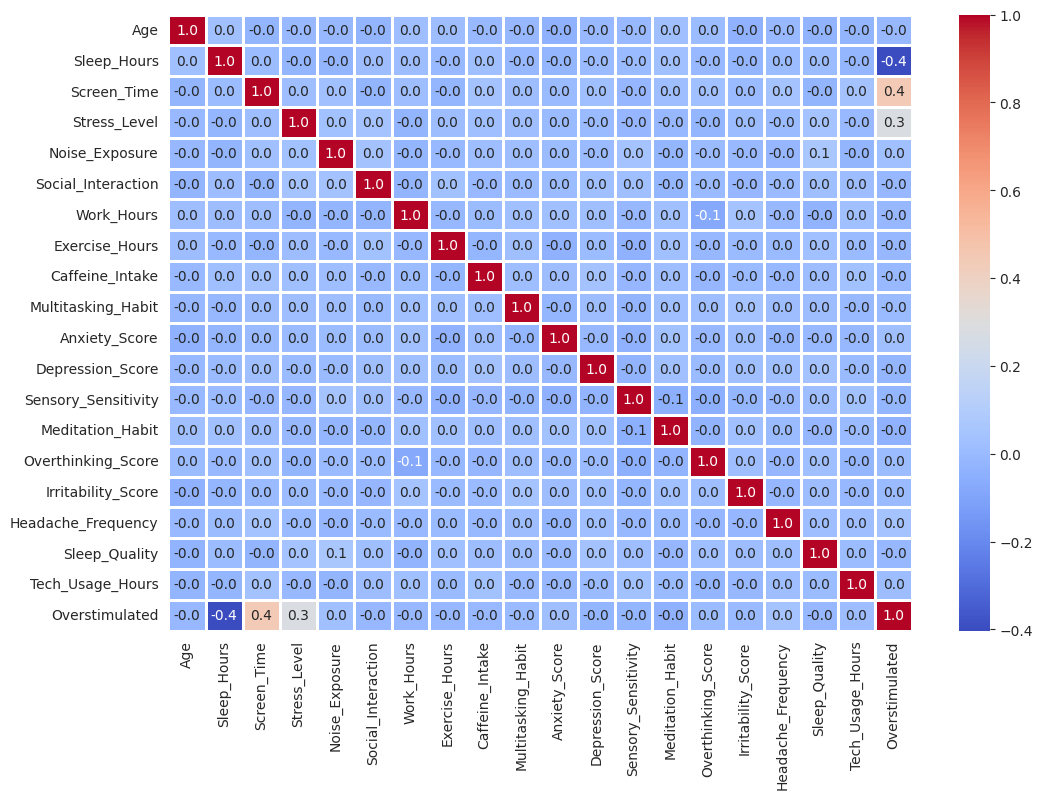

In [6]:
# Checking relationships

sns.heatmap(df.corr(), annot = True, fmt = ".1f", cmap = 'coolwarm', linewidths = 1)


plt.show()

In [7]:
df.columns

Index(['Age', 'Sleep_Hours', 'Screen_Time', 'Stress_Level', 'Noise_Exposure',
       'Social_Interaction', 'Work_Hours', 'Exercise_Hours', 'Caffeine_Intake',
       'Multitasking_Habit', 'Anxiety_Score', 'Depression_Score',
       'Sensory_Sensitivity', 'Meditation_Habit', 'Overthinking_Score',
       'Irritability_Score', 'Headache_Frequency', 'Sleep_Quality',
       'Tech_Usage_Hours', 'Overstimulated'],
      dtype='object')

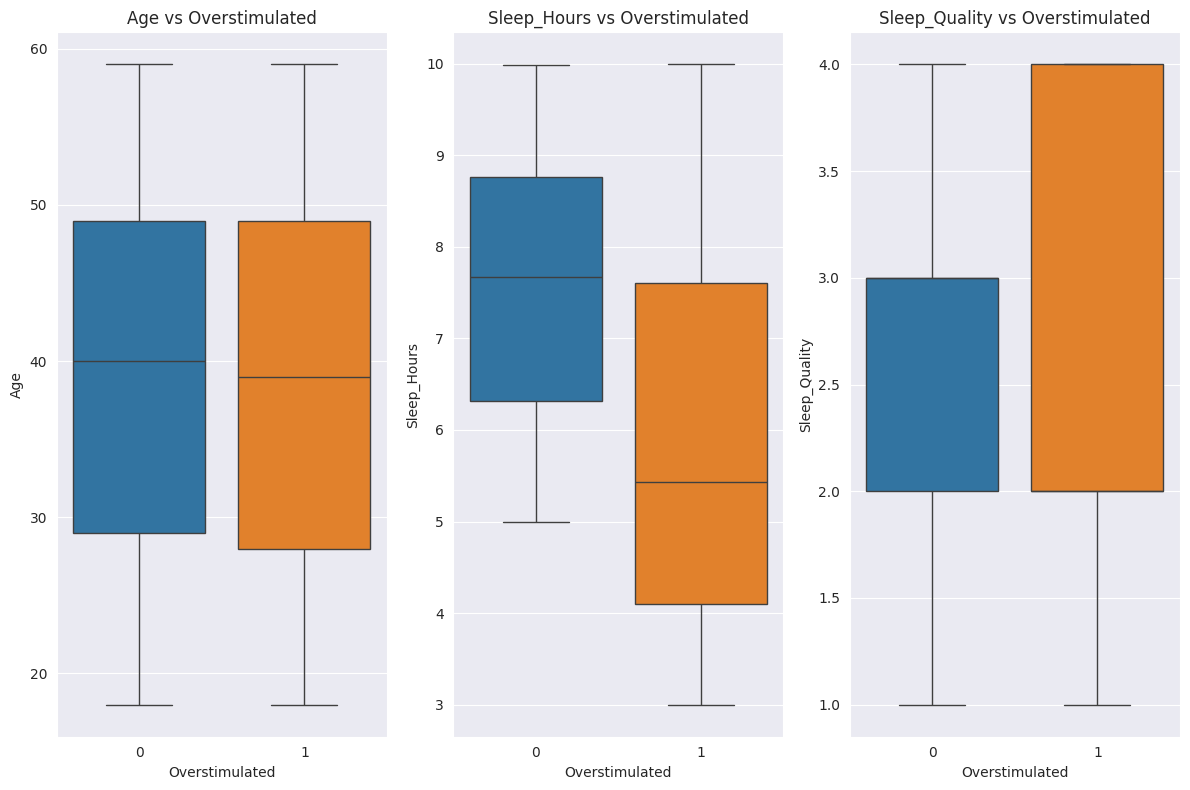

In [8]:
# Checking relationships with Overstimulated against the categories.

demo_rest = ['Age', 'Sleep_Hours', 'Sleep_Quality']

mental_health = ['Anxiety_Score', 'Depression_Score', 'Overthinking_Score', 'Headache_Frequency', 'Irritability_Score']

habits_exposures = ['Multitasking_Habit', 'Meditation_Habit',
                  'Social_Interaction', 'Screen_Time', 'Stress_Level', 'Noise_Exposure',
                  'Work_Hours', 'Tech_Usage_Hours', 'Sensory_Sensitivity',
                  'Caffeine_Intake', 'Exercise_Hours']


for i, feature in enumerate(demo_rest):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x="Overstimulated", y=feature, data=df, palette='tab10')
    plt.title(f"{feature} vs Overstimulated")
    plt.xlabel("Overstimulated")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()




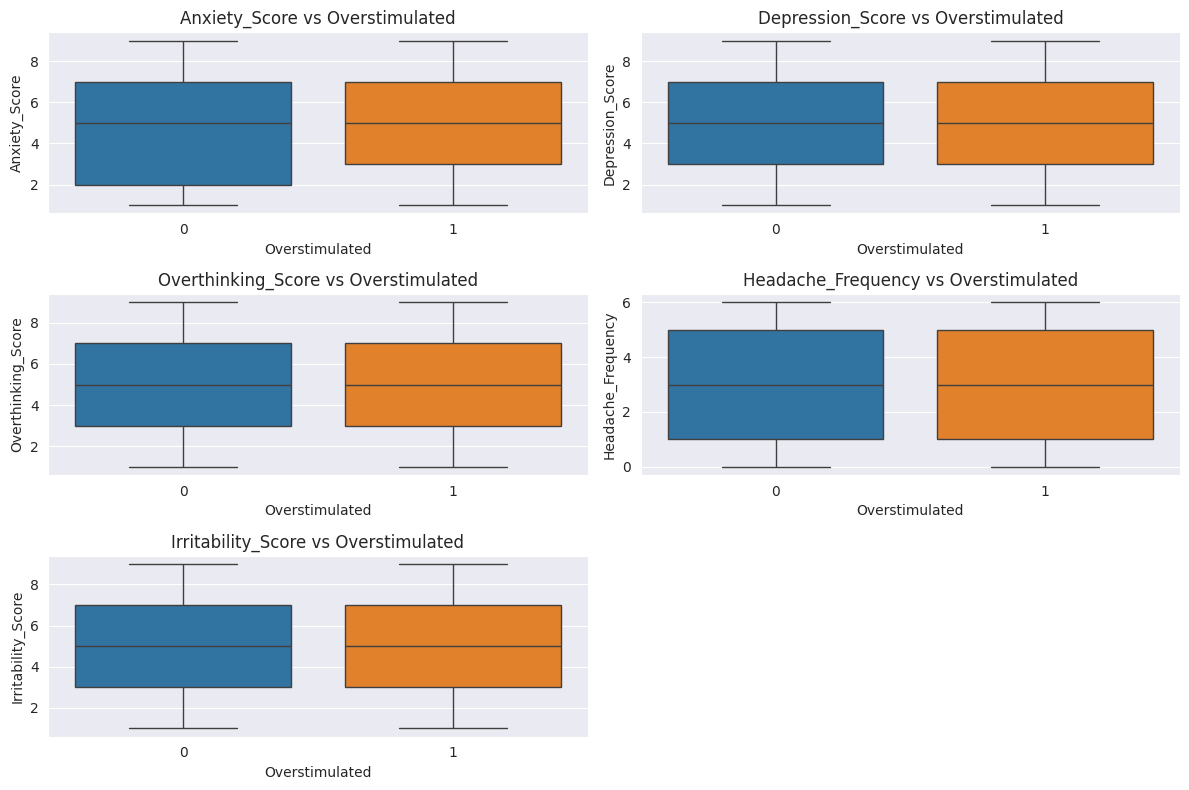

In [9]:
for i, feature in enumerate(mental_health):
  plt.subplot(3, 2, i + 1)
  sns.boxplot( x='Overstimulated', y = feature, data=df, palette='tab10')
  plt.title(f"{feature} vs Overstimulated")
  plt.xlabel("Overstimulated")
  plt.ylabel(feature)



plt.tight_layout()
plt.show()

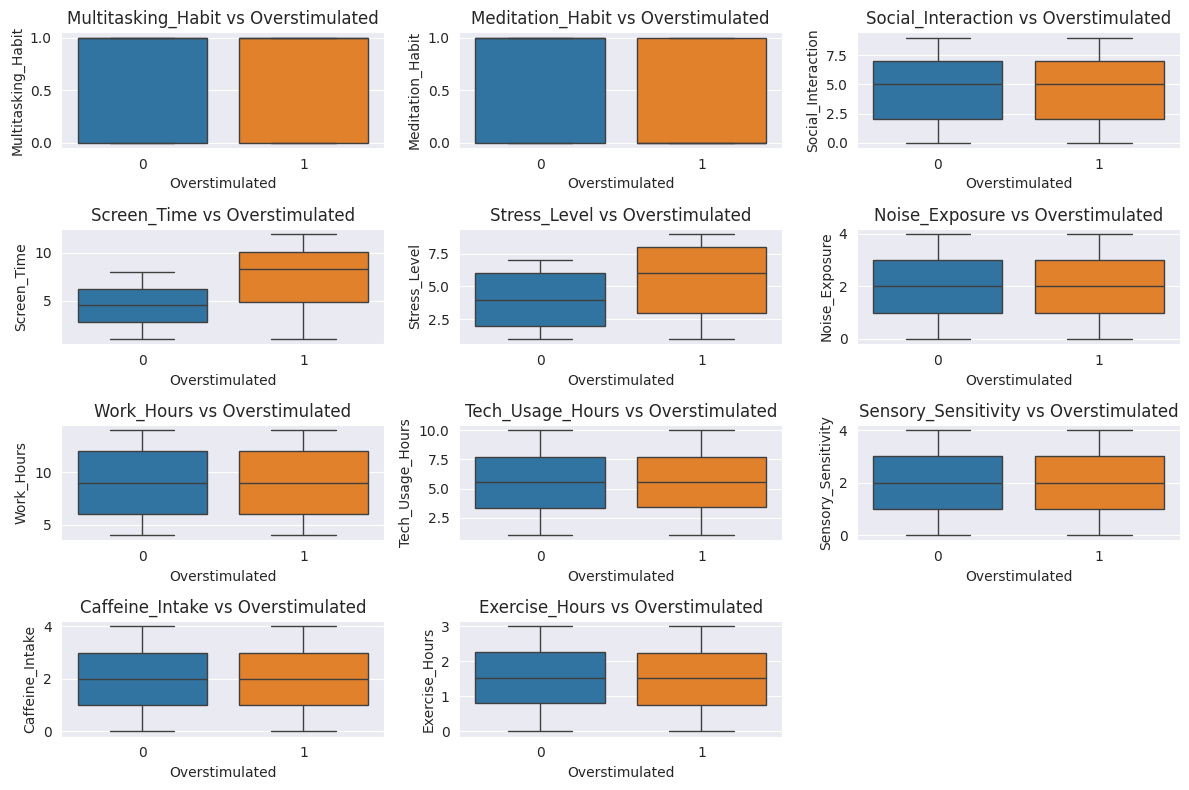

In [10]:
for k, feature in enumerate(habits_exposures):
  plt.subplot(4,3, k +1)
  sns.boxplot(x="Overstimulated", y=feature, data=df, palette="tab10")
  plt.title(f"{feature} vs Overstimulated")

plt.tight_layout()
plt.show()

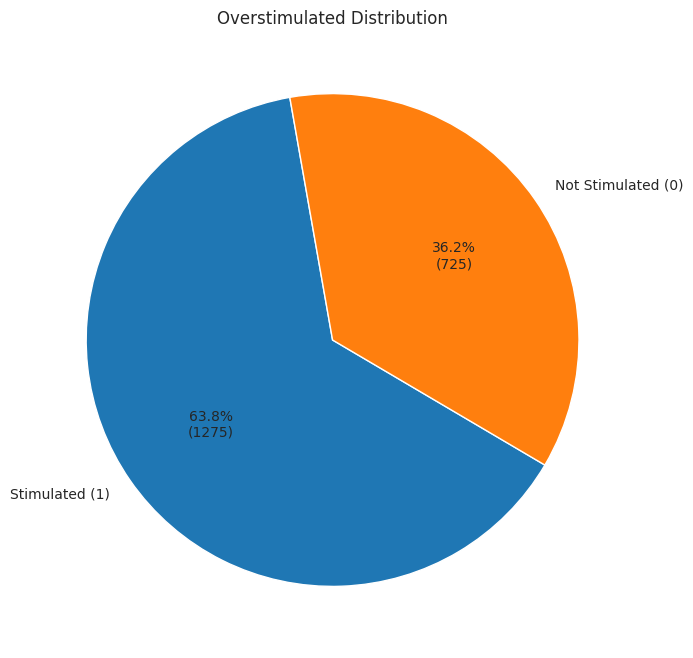

In [11]:
#Overstimulation Distribution

counts = df['Overstimulated'].value_counts()

labels = ['Stimulated (1)', 'Not Stimulated (0)']

plt.pie(counts, labels= labels,
        autopct=lambda pct: f"{pct:.1f}%\n({int(round(pct/100.*sum(counts)))})",
        colors = sns.color_palette('tab10'),
        startangle=100,
        wedgeprops=dict(width=1)
)
plt.title("Overstimulated Distribution")
plt.show()

In [12]:
# Create a new column called Age Group

bins = [17, 30, 45, 60]

labels= ['18-30', '31-45', '45-60']

df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

df.head()

,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,...,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated,Age_Group
0,56,7.767825,4.908517,2,0,8,11,2.054411,4,0,...,8,3,1,1,8,1,2,8.746524,0,45-60
1,46,4.270068,8.413936,9,4,4,10,2.513216,3,1,...,4,2,1,5,5,2,4,8.508448,1,45-60
2,32,6.676144,1.688213,5,2,8,12,2.123108,2,1,...,3,2,1,8,7,2,4,5.701592,0,31-45
3,25,7.963324,3.315576,7,2,8,13,1.217663,3,1,...,4,0,1,4,4,2,1,9.131087,0,18-30
4,38,3.748138,9.899260,5,0,5,4,0.093407,4,0,...,4,0,1,2,9,5,3,2.286433,1,31-45


In [13]:
# Checking some lifestyle features against age group

df.groupby('Age_Group')[['Sleep_Hours', 'Screen_Time', 'Work_Hours', 'Anxiety_Score',
                         'Depression_Score', 'Overthinking_Score', 'Irritability_Score']].mean().reset_index().round(3)

,Age_Group,Sleep_Hours,Screen_Time,Work_Hours,Anxiety_Score,Depression_Score,Overthinking_Score,Irritability_Score
0,18-30,6.361,6.515,8.896,5.104,4.985,5.049,5.266
1,31-45,6.585,6.294,8.868,4.771,4.909,5.051,5.025
2,45-60,6.539,6.419,8.994,4.879,4.921,5.003,5.034


In [14]:
age_stimulated = df.groupby(['Age_Group', 'Overstimulated']).agg(Count = ('Overstimulated', 'count')).reset_index()
age_stimulated

,Age_Group,Overstimulated,Count
0,18-30,0,205
1,18-30,1,403
2,31-45,0,284
3,31-45,1,422
4,45-60,0,236
5,45-60,1,450


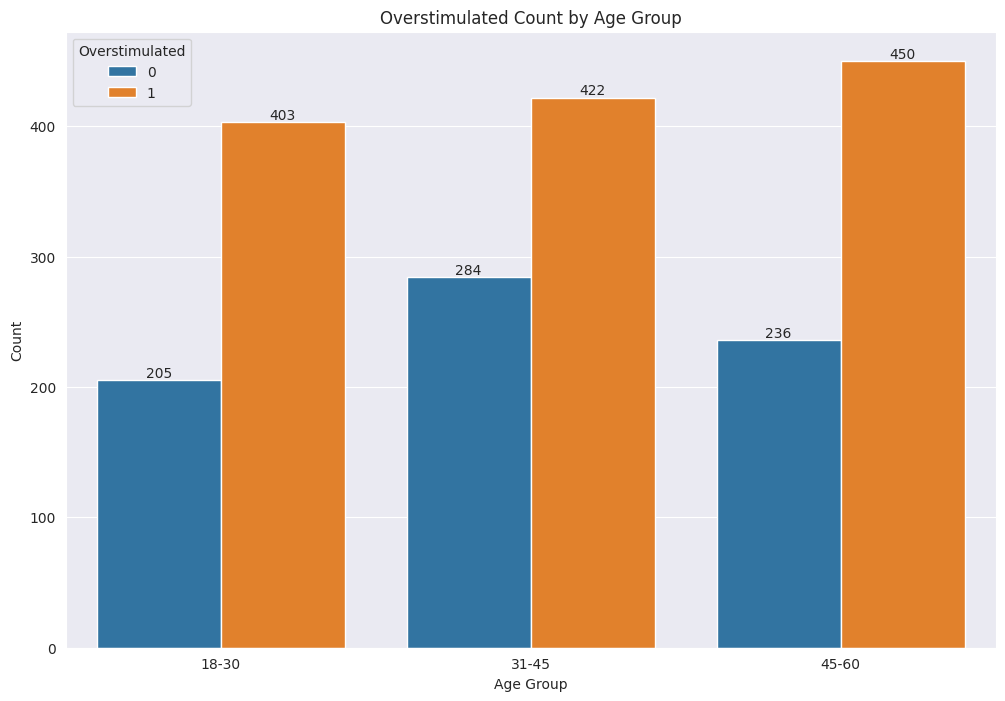

In [15]:
# Visualising Age Group vs Overstimulated


ax = sns.barplot(x="Age_Group", y="Count", hue="Overstimulated", data=age_stimulated)

for i in ax.containers:
  ax.bar_label(i,)


plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Overstimulated Count by Age Group")

# Show the plot
plt.show()


## Findings from EDA

1. There are more overstimated individuals (63.8%, 1272) than not stimulated (36.2%; 725)

2. There is a mild negative correlation between Overstimulated and Sleep Hours (-0.4), and a reverse case for Screen Time (0.4)

In checking different sections against overstimulated, it was observed that:

- Individuals who are overstimulated tend to sleep less than those who are not. The minimum sleep time for overstimulated individuals was 3 hours, while for not stimulated persons was 6.3 hours.

- There is no notable difference in the mental health category between overstimulated and not stimulated individuals.

- In habits and exposure, overstimulated individuals have longer screen time hours, as well as higher stress levels compared to non stimulated group.

- In looking at Age Croups and key variables, the following were observed:

- Individuals between 18-30 have longer mean Screen Time hours, higher Anxiety, Depression and Irritability Scores than the rest. However, the 45-60 group have higher work hours, while 31-45 have higher Overthinking score.

- In visualising Age group vs overstimation, it was discovered that the 45-60 group were more overstimulated than others. It was observed that the higher the age, the more the individual becomes overstimulated.
This does not agree with [Rehabmart.com]("https://www.rehabmart.com/post/can-sensory-issues-get-worse-with-age#:~:text=With%20early%20intervention%2C%20appropriate%20treatment,challenges%20can%20intensify%20with%20age.") which says that Sensory Issues tend to improve as a child grows older, and many children experience reduced sensitivities as they transition into adulthood.


## Data Preprocessing for Predictive Model

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score


In [17]:
# Defining X and Y variables

X = df.drop("Overstimulated", axis = 1)
y = df["Overstimulated"]


# Convert categorical variables if any
X = pd.get_dummies(X, drop_first= True)

# Split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [18]:
# RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediction

rf_preds = rf_model.predict(X_test)


# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))
print("Accuracy:", accuracy_score(y_test, rf_preds))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       145
           1       1.00      1.00      1.00       255

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[144   1]
 [  0 255]]
Accuracy: 0.9975


In [19]:
# XGBoost Classifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions

xgb_preds = xgb_model.predict(X_test)

# Evaluation
print("\n XGBoost Classification Report:")
print(classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))
print("Accuracy:", accuracy_score(y_test, xgb_preds))


 XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       255

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Confusion Matrix:
 [[145   0]
 [  0 255]]
Accuracy: 1.0


# Model Performance:


Classification Report:
1. Both models has a precision score of 100%, however, for Random Forest Classification, the recall accuracy is 99%. The model caught 99% of overstimulated cases.

2. Both F1 scores are 100% which means the model is effective at predicting Overstimulation score.






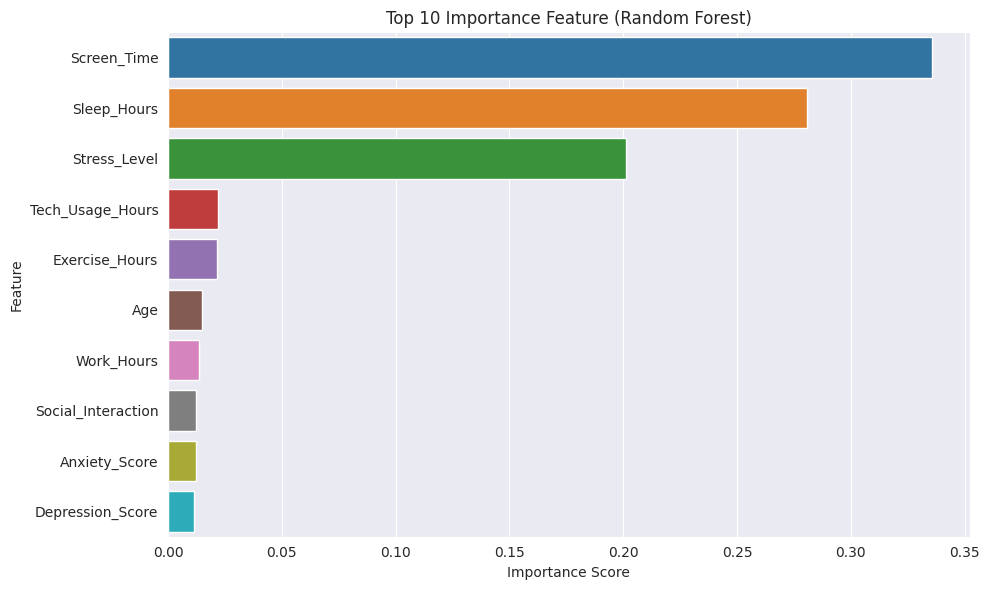

*************
              Features  Importance
2          Screen_Time    0.335518
1          Sleep_Hours    0.280887
3         Stress_Level    0.201371
18    Tech_Usage_Hours    0.022123
7       Exercise_Hours    0.021699
0                  Age    0.014987
6           Work_Hours    0.013725
5   Social_Interaction    0.012267
10       Anxiety_Score    0.012148
11    Depression_Score    0.011491


In [20]:
# Checking to see what features Random Forest considers important

importance = rf_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Features': features,
    'Importance': importance
}).sort_values(by='Importance', ascending = False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Features', data=feature_importance_df.head(10), palette='tab10')
plt.title('Top 10 Importance Feature (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')


plt.tight_layout()
plt.show()

print('*************')

print(feature_importance_df.head(10))

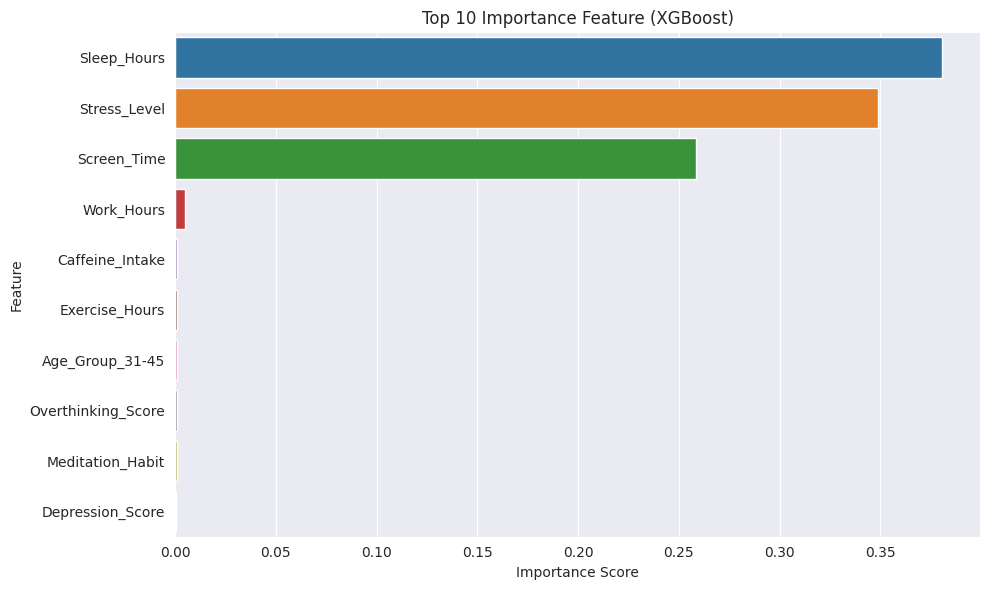

****************
              Features  Importance
1          Sleep_Hours    0.380400
3         Stress_Level    0.348868
2          Screen_Time    0.258485
6           Work_Hours    0.005134
8      Caffeine_Intake    0.001052
7       Exercise_Hours    0.001044
19     Age_Group_31-45    0.000987
14  Overthinking_Score    0.000968
13    Meditation_Habit    0.000798
11    Depression_Score    0.000659


In [21]:
# Important Features for XGBoost

importance = xgb_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Features': features,
    'Importance': importance
}).sort_values(by='Importance', ascending = False)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Features', data=feature_importance_df.head(10), palette='tab10')
plt.title('Top 10 Importance Feature (XGBoost)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')


plt.tight_layout()
plt.show()


print('****************')

print(feature_importance_df.head(10))

#### Based on the feature importance of the two models, it can be observed that they both consider different features as strong predictors of Overstimulation.

## Summary, Recommendation and Conclusion

### Summary

* The analyses show that older people (45 – 60) were more overstimulated than the younger age groups (18 -30, 31 – 45).

* Individuals who are overstimulated have lesser sleep hours than those who are not overstimulated.

* Overstimulated individuals have longer screen time hours as well as higher stress levels compared to non stimulated group.

* Based on the models created, they recognized Screen Time, Sleep Hours and Stress Levels as factors that can cause overstimulation.

### Recommendation

**Reduce Screen Time**

* Cutting down on screen time can significantly lower feelings of overstimulation and improve mental well-being.

**Prioritize Sleep**
* Getting adequate sleep is crucial for mental health and can help combat the effects of overstimulation.

**Mindfulness Practices**
Incorporating mindfulness practices such as meditation can help calm the mind and reduce overstimulation.


### Conclusion

**Need for Awareness**

* Raising awareness about these correlations is essential for individuals to make informed choices regarding their health.

**Proactive Changes**

* Implementing proactive changes in daily routines can help mitigate the effects of overstimulation and improve overall health.
